# Ideas
  * let them calculate a synchronous phase and try it out
  * add damping term
  * exercise about bunch length for electrons with damping

In [1]:
%pylab notebook
from ipywidgets import interact
from time import sleep
rcParams['axes.grid'] = True

Populating the interactive namespace from numpy and matplotlib


# Computer Lab: Longitudinal Motion
### USPAS 2020 Fundamentals of Accelerator Physics and Technology 
_Authors: E. Harms, N. Neveu (2019), M. Betz (2020)_

This worksheet demonstrates phase space motion in the longitudinal degree of freedom.   
Questions to be answered and turned in for grade are typeset in **Bold** Type.

## 1. Longitudinal Phase Space Motion

From the `Longitudinal Motion I` lecture we recall the equations for longitudinal motion.
For this simulation we simplify them a bit by neglecting the damping term and only considering deviations from the ideal particle:

$$\begin{aligned}
\Delta \dot{E} &= k_1 \left[\sin(\Psi_0 + \Delta \Psi) - \sin(\Psi_0)\right],\\
\Delta \dot{\Psi} &= k_2 \Delta E,
\end{aligned}$$

where $\Psi$ is the phase (= arrival time) with respect to the RF system, 
$\Psi_0$ is the constant synchronous phase and 
$\Delta E$ is the energy gain per turn.

The two constants are:

$$\begin{aligned}
k_1 &= \frac{q V_0}{T_0},\\
k_2 &= \frac{2 \pi h}{\beta^2 T_0 E} \eta.
\end{aligned}$$

They are explained in the python code below ...

The two __differential equations__ can be converted into __difference equations__: 



$$\begin{align}
\Delta E_{n+1} &= \Delta E_n + k_1 \left[\sin(\Psi_0 + \Psi_{n + 1}) - \sin(\Psi_0)\right], \\
\Delta \Psi_{n+1} &= \Delta \Psi_n + k_2 \Delta E_n.
\end{align}$$


Each evaluation $n$ corresponds to the particles taking one turn in the circular machine.

The following cells allow the user to enter various initial conditions (i.e. various $\phi_0$, $\Delta E_0$) of particles and track their motion for a specified number of iterations.

In order to do the calculations in Python, the equations had to be written such that the indices of order n appear on the right-hand side, and indices of order n+1 appear on the left. You should verify that the difference equations here are equivalent to the ones derived in class.

In the worksheet program, the user can vary the parameters of the basic equations of motion to produce phase space plots in $\Delta E_0 -\phi$ coordinates.  
The default parameters are typical of Fermilab Main Injector operation at its injection energy.  
By inputting various initial conditions one can explore the phase space region under various parameter regimes.  
For example: The synchronous phase is initialized to 0. For this value locate the separatrix.

## Evaluate the difference equations for `N` turns and `P` particles

Initial energies [eV]: [ 1000000.  2000000.  3000000.  4000000.  5000000.  6000000.  7000000.
  8000000.  9000000. 10000000. 11000000. 12000000. 13000000. 14000000.
 15000000.]


<IPython.core.display.Javascript object>


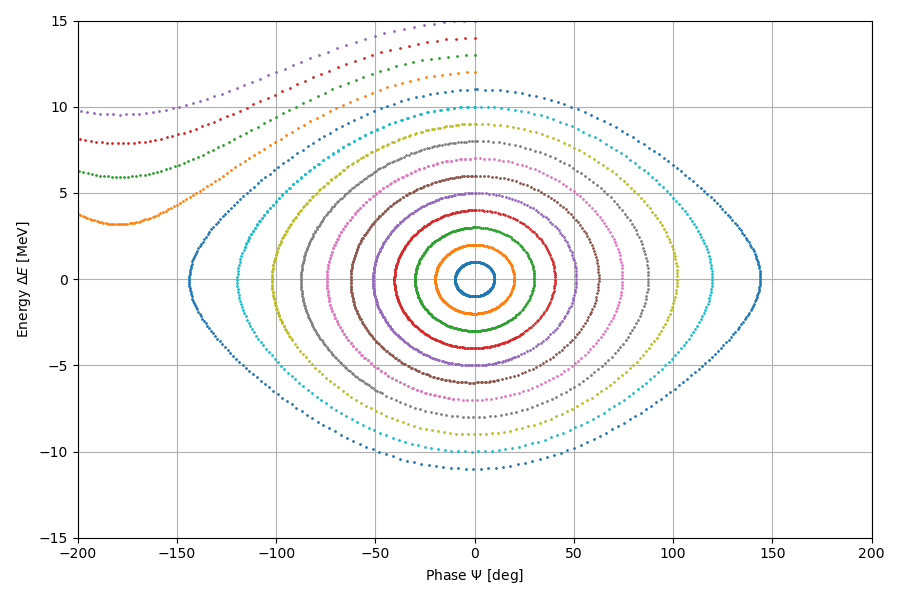

In [74]:
N = 300  # number of turns the particles travel
P = 15  # Number of particles

# -------------------------------------
#  Initial Energy of particles in [eV]
# -------------------------------------
# dE_init = array([1, 2, 4, 6, 8]) * 1e6  # make sure you add `P` values
dE_init = linspace(1e6, P * 1e6, P)
# dE_init = rand(P) * 20e6
print("Initial energies [eV]:", dE_init)

# -------------------------------------
#  Initial Phase of particles [rad]
# -------------------------------------
Psi_init = zeros(P)
# Psi_init = (rand(P) - 0.5) * 2 * pi

# Setup (empty) plot with one line for each particle trajectory
# values to be updated later
close()
fig, ax = subplots(figsize=(9, 6))
ls = [ax.plot(zeros(N), zeros(N), 'o', markersize=1)[0] for p in range(P)]
ax.set_xlabel('Phase $\Psi$ [deg]')
ax.set_ylabel('Energy $\Delta E$ [MeV]')
ax.axis((-200, 200, -15, 15))
fig.tight_layout()

def update(Psi_0_deg=0, V_0=200e3):
    ''' gets evaluated every time the slider widget is moved '''
    q = 1  # charge of a proton [e]
    # V_0 = 200e3 # peak RF voltage in the cavity [V]  SLIDER
    T_0 = 1 #  Revolution period of nominal particle [s] TODO needs to be 1, why?
    k1 = q * V_0 / T_0
    # Unit of k1: [eV / s] = power = change of energy over time

    h = 588  # harmonic number
    E = 8e9  # energy of the synchronous particle [eV]
    m_0 = 938.3e6  # proton rest-mass [eV / c**2]
    gamma = E / m_0  # Lorentz factor

    beta = sqrt(1 - 1 / gamma**2)  # fraction of the speed of light

    # momentum compaction factor: change of path length / change of momentum
    alpha_c = 1e-3 

    # slip factor, pos: trajectory dominates arrival time, neg: velocity dominates arrival time
    eta = alpha_c - 1 / gamma**2

    # k2 should be [1 / W] TODO verify
    k2 = 2 * pi * h / (beta**2 * T_0 * E) * eta
    
    Psi_0 = deg2rad(Psi_0_deg) # synchronous phase [rad] SLIDER

    # Create two lists which will hold hold energy and phase results for each turn
    # dE_n[-1] returns the last element of the list
    dE_n = [dE_init] 
    Psi_n = [Psi_init]

    # Calculate dE and Psi for each particle for N turns.
    for n in range(N):
        next_Psi = Psi_n[-1] + k2 * dE_n[-1]
        next_dE = dE_n[-1] + k1 * (sin(next_Psi + Psi_0) - sin(Psi_0))
        Psi_n.append(next_Psi)
        dE_n.append(next_dE)

    # Convert lists to 2D numpy arrays
    # indices: [turn index n, particle index p]
    dE_n = vstack(dE_n)
    Psi_n = vstack(Psi_n)
    
    # Update the plot
    for i, l in enumerate(ls):
        l.set_data(rad2deg(Psi_n[:, i]), dE_n[:, i] / 1e6)


In [75]:
interact(update, Psi_0_deg=(-180, 180, 0.2), V_0=(1, 1e6, 10e3))

interactive(children=(FloatSlider(value=0.0, description='Psi_0_deg', max=180.0, min=-180.0, step=0.2), FloatS…

<function __main__.update(Psi_0_deg=0, V_0=200000.0)>

# TODO / ideas
  * phase acceptance?
  * add losses to the equation, phy0, energy gain / turn to compensate losses (e.g. light source)
  * nonlinear momentum compaction factor
  


# Questions

The user should feel free to play with the parameters of the program.  
Put in the parameters of you “favorite” accelerator and explore phase space.  
Be sure to play with changing the scales of the plot axes in order to see the results.

### Q1) What value of $\Delta E$ will the Radiofrequency system support under the default conditions?

<br><br><br><br>

Without touching the sliders, increase the number of particles to plot `P`. To get a more precise answer, the initial particle energy can be directly entered in `dE_init`.

### Q2) What happens to the particles that find themselves outside of the separatrix – are they lost from the synchrotron?  

<br><br><br><br>

Use the [zoom control](https://matplotlib.org/users/navigation_toolbar.html) of the plot to zoom out. 
Look at the motion of a particle that is very near the separatrix.

### Q3) How does the motion behave near the “unstable fixed points”?

<br><br><br><br>

Now use the slider `Psi_0_deg` to change the synchronous phase, $\phi_s$, to $30^{\circ}$ (what happens in a synchrotron when this phase change occurs?).

***Under these conditions...***

### Q4) What value (approximately) of $\Delta E$ will the Radiofrequency system support now?

<br><br><br><br>

### Q5) What happens to the particles that find themselves outside of the separatrix – are they lost from the synchrotron?

<br><br><br><br>

### Q6) Find the position of the “unstable fixed points” again. Did they move with synchronous phase?

<br><br><br><br>



### Q7) Whats the maximum $\Delta E$ after increasing the RF voltage to `V_0 = 750 kV`?

explain the effects you see when moving the `V_0` slider. 

<br><br><br><br>

### Optional 
Since the difference equations are of a non-linear system, one can push the parameters until resonance islands, chaos, and other non-linear effects are found.  
Go back to the “stationary bucket” case ($\phi_s$ = 0): 
- Increase the voltage by a factor of 10 and look at the phase space; 
- another factor of 10; another; and so on. 
- Can you find other regions of stability in the phase space? 
- Is there a value of the voltage for which the entire phase space becomes unstable?